<a href="https://colab.research.google.com/github/michelucci/oreilly-london-ai/blob/master/day1/First_Example_of_a_CNN_(CIFAR10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First example of a CNN

(C) Umberto Michelucci

umberto.michelucci@toelt.ai

www.toelt.ai

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

#from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback

from tensorflow.keras.datasets import cifar10
import numpy as np
from tensorflow.keras import utils

import matplotlib.pyplot as plt



In [16]:
import matplotlib as mpl
mpl.style.use('classic')

## Model

In [17]:
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

In [18]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [19]:
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [20]:
nClasses = 10
y_train = utils.to_categorical(y_train,nClasses)
y_test = utils.to_categorical(y_test,nClasses)

In [21]:
x_train.shape[1:]

(32, 32, 3)

In [22]:
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

In [23]:
K.clear_session()
model = createModel()

In [24]:
AdamOpt = Adam(learning_rate=0.001)
model.compile(optimizer=AdamOpt, loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 10)


In [26]:
print(x_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 10)


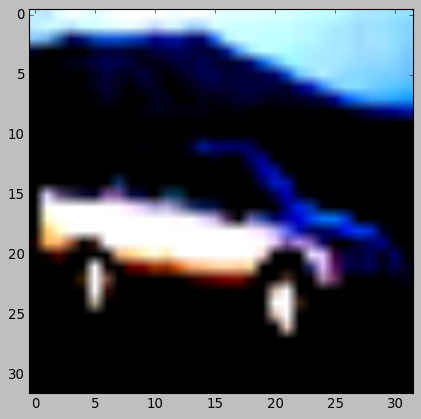

In [27]:
plt.imshow(x_train[4])

In [28]:
batch_size = 256
epochs = 3 # Try with >10 epochs

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(x_test, y_test))

Epoch 1/3
196/196 [==============================] - 18s 89ms/step - loss: 1.8131 - accuracy: 0.3243 - val_loss: 1.4336 - val_accuracy: 0.4816
Epoch 2/3
196/196 [==============================] - 17s 88ms/step - loss: 1.3616 - accuracy: 0.5027 - val_loss: 1.1762 - val_accuracy: 0.5729
Epoch 3/3
196/196 [==============================] - 17s 87ms/step - loss: 1.1654 - accuracy: 0.5821 - val_loss: 1.0192 - val_accuracy: 0.6360


In [29]:
history.history

{'loss': [1.8130974769592285, 1.361627221107483, 1.1654384136199951],
 'accuracy': [0.32425999641418457, 0.5026999711990356, 0.5820800065994263],
 'val_loss': [1.4335781335830688, 1.1762075424194336, 1.0192171335220337],
 'val_accuracy': [0.48159998655319214, 0.5728999972343445, 0.6359999775886536]}

Text(0, 0.5, 'Loss')

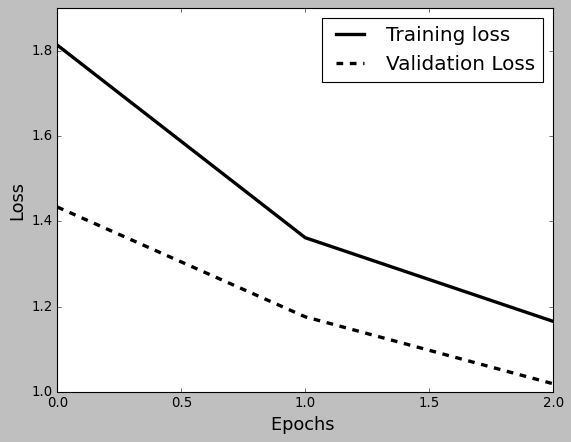

In [30]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'black',linewidth=3.0)
plt.plot(history.history['val_loss'],'black',ls = '--', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
#plt.title('Loss Curves',fontsize=16)


Text(0, 0.5, 'Accuracy')

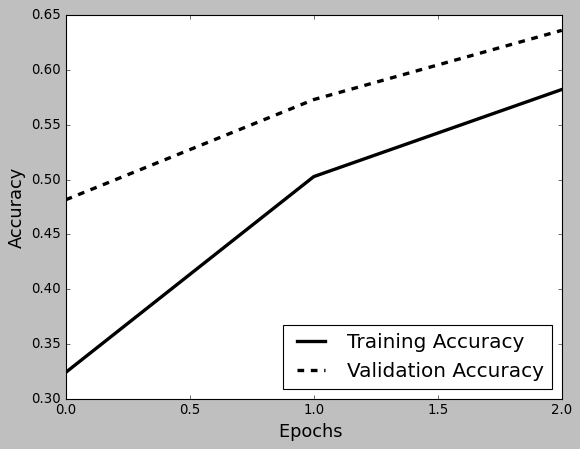

In [31]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'black',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'black',ls = '--',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18, 
           loc = 'lower right')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
#plt.title('Accuracy Curves',fontsize=16)
